Columns in DataFrame: Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')
Selected Features: ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']


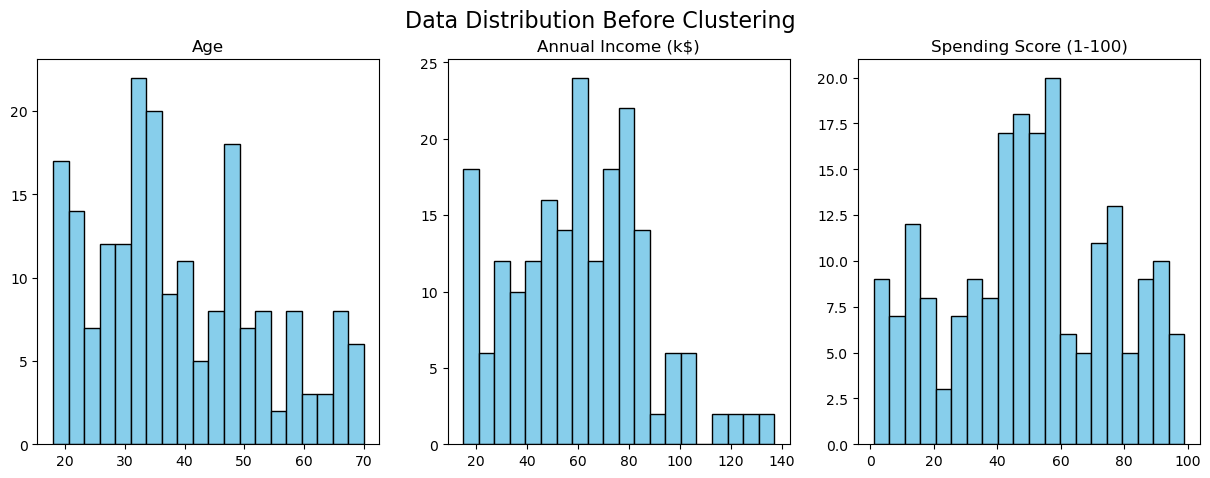

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

def visualize_data_before(data, features):
    print("Columns in DataFrame:", data.columns)
    print("Selected Features:", features)
    
    fig, axs = plt.subplots(1, len(features), figsize=(15, 5))#visualizing the features 
    for i, feature in enumerate(features):
        axs[i].hist(data[feature], bins=20, color='skyblue', edgecolor='black')#ploting histogram
        axs[i].set_title(feature)
    plt.suptitle('Data Distribution Before Clustering', fontsize=16)
    plt.show()
# Load the data
data = pd.read_csv('Customers_mall.csv')

# Specify the features to visualize
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
visualize_data_before(data, features)# Visualize data distribution before clustering


C:\Users\affaf\Desktop\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\affaf\Desktop\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


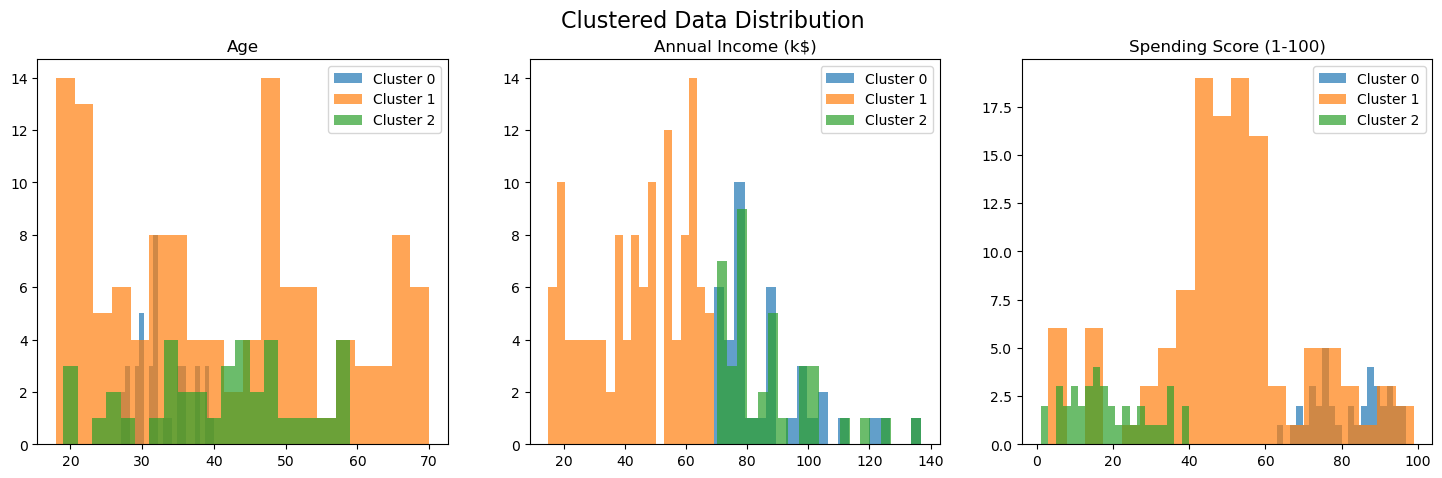

In [3]:
from sklearn.cluster import KMeans

def perform_kmeans_clustering(data, num_clusters):
    # Select features for clustering
    features_for_clustering = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
    X = data[features_for_clustering]

    # Perform K-means clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    data['Cluster'] = kmeans.fit_predict(X)
    
    return data

def visualize_clustered_data(data):
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))
    
    for i, feature in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)']):
        for cluster in sorted(data['Cluster'].unique()):
            cluster_data = data[data['Cluster'] == cluster]
            axs[i].hist(cluster_data[feature], bins=20, alpha=0.7, label=f'Cluster {cluster}')
            axs[i].set_title(feature)
            axs[i].legend()
    
    plt.suptitle('Clustered Data Distribution', fontsize=16)
    plt.show()

# Perform K-means clustering
num_clusters = 3
data = perform_kmeans_clustering(data, num_clusters)

# Visualize clustered data
visualize_clustered_data(data)
